In [1]:
# Imports
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

import matplotlib
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')
df.drop(columns=['Index', 'delete'], inplace=True)
print(df.head())

   Realization   Forecast
0     0.931534   0.838380
1    21.229124  19.106212
2    28.544289  25.689860
3     6.342930   5.708637
4    18.398031  16.558228


In [55]:
x = df['Forecast'].to_numpy()
y = df['Realization'].to_numpy()


x = np.random.rand(400) * 10
y = x + (np.random.rand(400) - 0.5)* 3

In [57]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)


    def forward(self, x):
        return self.linear(x)


In [166]:
rho = 0.9
rho_adj = 0.3
lambda_F = 1.3
lambda_H = 1.3
lambda_UP = 0.7
lambda_DW = 1.7

def operatorLoss(bid, realization):
    sold = torch.maximum(realization - bid, torch.zeros(1))
    bought = torch.maximum(bid - realization, torch.zeros(1))
    # print(f"We bought {bought} and sold {sold}")
    loss = - lambda_F * bid - lambda_UP * sold + lambda_DW * bought # Reversed signs because loss is minimized
    return loss

In [168]:

bid = np.array([5, 5, 5, 5])
realization = np.array([4.8, 4.9, 5.1, 4.3])
forecast = realization * 1.3

bid_torch = torch.FloatTensor(bid).reshape(-1, 1)
realization_torch = torch.FloatTensor(realization).reshape(-1, 1)
forecast_torch = torch.FloatTensor(forecast).reshape(-1, 1)


m = LinearModel(1, 1)
output = m(forecast_torch)
loss = operatorLoss(output, realization_torch)
print(loss)
# optim = torch.optim.SGD(m.parameters(), lr=0.001)
loss.backward()
print(m.weight.grad)


tensor([[-4.7651],
        [-4.8537],
        [-5.0309],
        [-4.3222]], grad_fn=<AddBackward0>)


RuntimeError: grad can be implicitly created only for scalar outputs

In [141]:
model = LinearModel(1, 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [142]:
x_torch = torch.FloatTensor(x).reshape(-1, 1)
y_torch = torch.FloatTensor(y).reshape(-1, 1)

In [143]:

x_train = x_torch[:300]
y_train = y_torch[:300]
x_valid = x_torch[300:350]
y_valid = y_torch[300:350]
x_test = x_torch[350:]
y_test = y_torch[350:]

In [144]:
losses = []

# Training loop
for epoch in range(200):
    if (epoch % 100 == 0):
        print(f"Now in epoch {epoch}")
    
    optimizer.zero_grad()
    y_hat = model(x_train)

    loss = loss_fn(y_hat, y_train)
    loss.backward()
    

    optimizer.step()


    losses.append(loss.item())

    



Now in epoch 0
Now in epoch 100


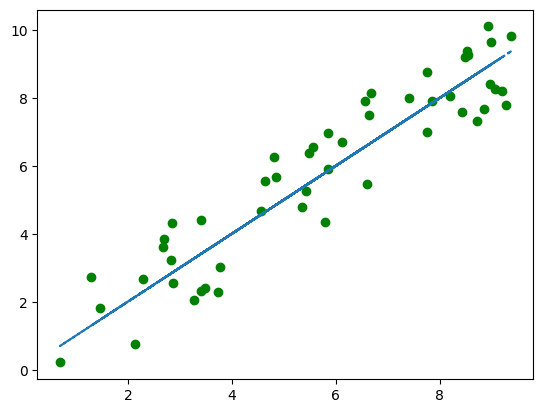

In [145]:
y_pred = model.forward(x_valid)
plt.plot(x_valid, y_valid, 'go')
plt.plot(x_valid, y_pred.detach().numpy(), '--')

In [146]:
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[0.9989]], requires_grad=True)
linear.bias Parameter containing:
tensor([0.0113], requires_grad=True)


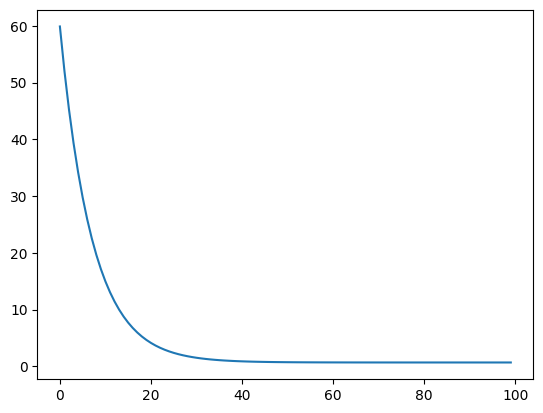

In [147]:
plt.plot(np.arange(0, 100, 1), losses[:100])

In [2]:
import numpy as np

In [5]:
1.3 + (np.random.rand(10) - 0.5)/5

array([1.3928639 , 1.28684199, 1.20182008, 1.20636038, 1.23086278,
       1.39256566, 1.2537517 , 1.25913517, 1.33020145, 1.21392255])